In [2]:
import matplotlib.pyplot as plt
def plot_behaviers(file_name):
    # plot actions
    file=open(file_name,"r")
    actions=[]
    for line in file.readlines():
        action=line.split(",")
        for a in action:
            actions.append(a)
    lst=[]
    for a in actions:
        b=a.strip('[').strip(']').split(" ")
        lst.append(b)
    action_values=[]
    for l in lst:
        for s in l:
            if (s!='0.' and s!=""):
                    if s!=']':
                        s=s.rstrip("]")
                        action_values.append(float(s))  
    return action_values

In [3]:
def plot_rewards(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    Rewards=[]
    for r in R:
        if r!='':
            Rewards.append(float(r))
    plt.figure(figsize=(20,8))
    plt.plot(Rewards)

In [4]:
def plot_vel(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    vels=[]
    for r in R:
        if r!='':
            vels.append(float(r))
    return(vels)

#### DDPG模型  
* <div style="color:red"> states取5维  [z,ox,oy,oz,vel]</div>
* soft update 参数 0.001
* gamma 0.99
* Memory   按优先级存储/取样
   * 容量 1000
   * 一次取样量 100
   
* Actor  
   * 优化器 Adam: lr=0.0001  
   * 网络结构 2 hidden-layers(64-32)
   * 激活函数 relu+ tanh
   * 批归一化
* Critic
   * 优化器 Adadelta(默认)
   * l2正则化(10-5)
   * 网络结构 state:（64-32）+ actions:32
   
   
 #### 奖励函数  
 ```    
        """速度惩罚"""
        reward=-abs(self.velocity)*50            

        if pose.position.z < self.target_z:
            """飞行方向惩罚"""
            if pose.orientation.z!=0.0:
                punish=(pose.orientation.z/abs(pose.orientation.z))*5
                reward+=min(0,punish) 
            if self.velocity < 0.0:
                reward-=10
        elif pose.position.z > self.target_z:
            """高度偏离惩罚"""
            reward+=-abs(self.target_z-pose.position.z)*10
            """速度惩罚"""
            if self.velocity < 0:
                reward+=50
            elif self.velocity > 0:
                reward-=100
           
        """高度目标奖励,速度目标奖励（0.0)"""
        if abs(pose.position.z-self.target_z) < 0.3:
            self.target_hit+=1
            reward+=10*(self.target_hit)**2
            if self.velocity==0.0:
                reward+=100
            
        """阶段结束条件"""
        if pose.position.z > self.height_limit:
            reward-=1000
            done=True
        if timestamp > self.max_duration:
            done=True
 ```

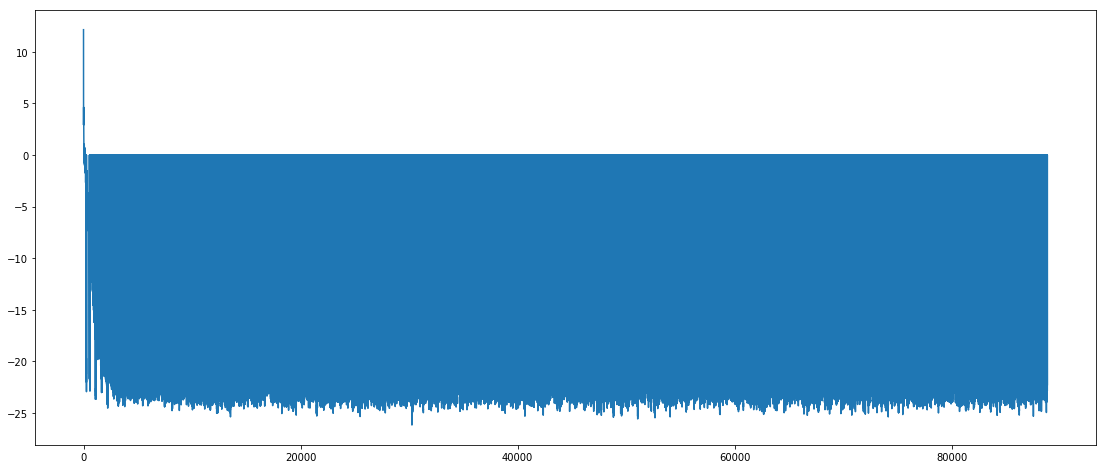

In [5]:
action_values=plot_behaviers("actions_01.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

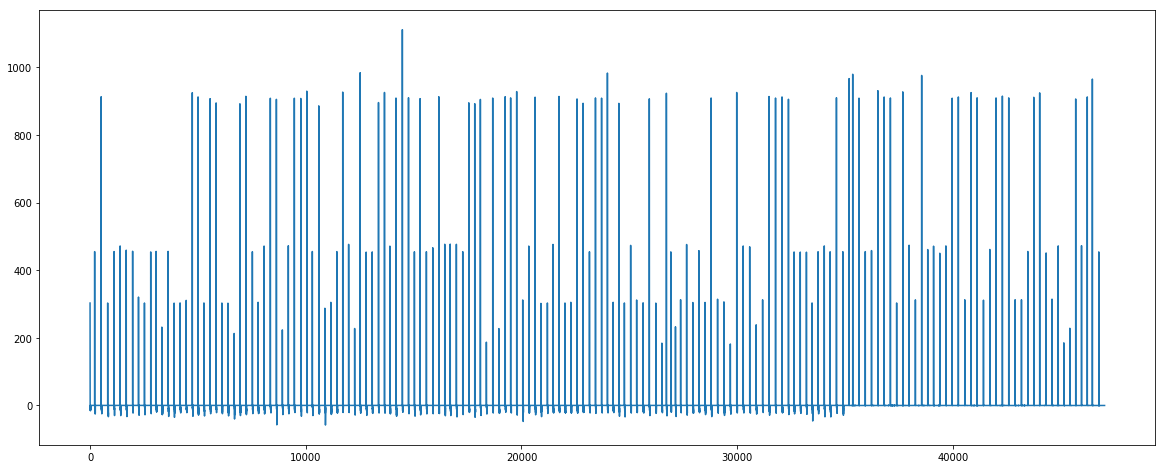

In [7]:
vels=plot_vel("states_01.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=6000,right=8000)
#plt.ylim(bottom=-20,top=100)

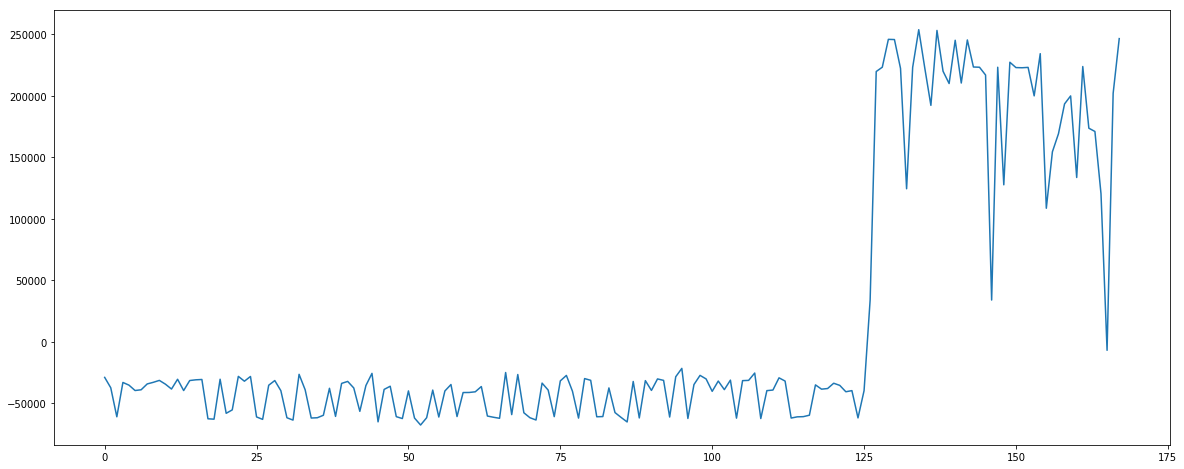

In [8]:
plot_rewards("rewards_01.txt")

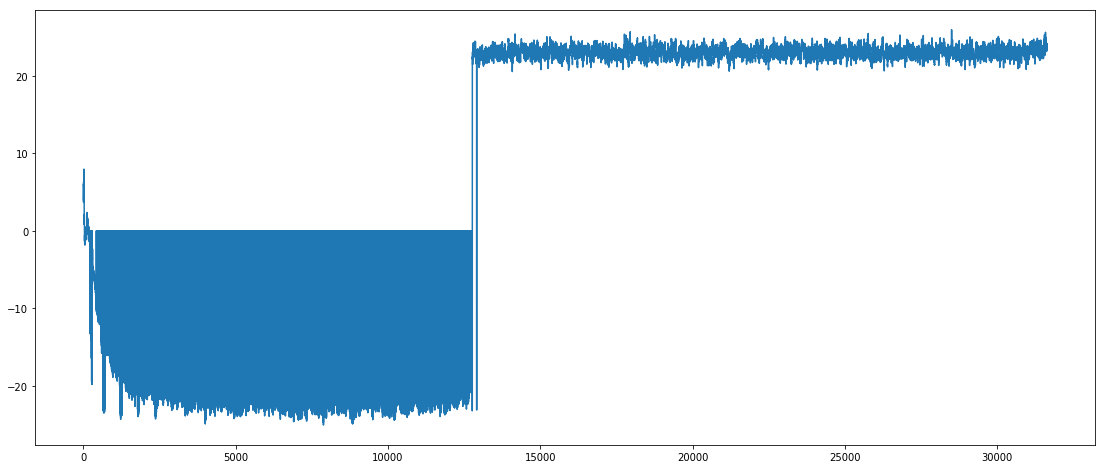

In [5]:
action_values=plot_behaviers("actions_02.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

(-20, 100)

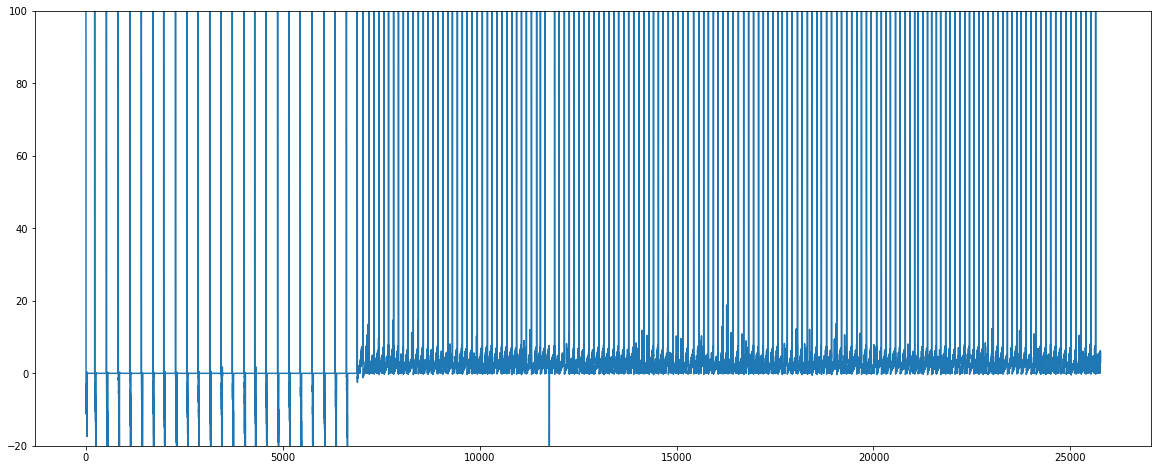

In [7]:
vels=plot_vel("states_02.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=6000,right=8000)
plt.ylim(bottom=-20,top=100)

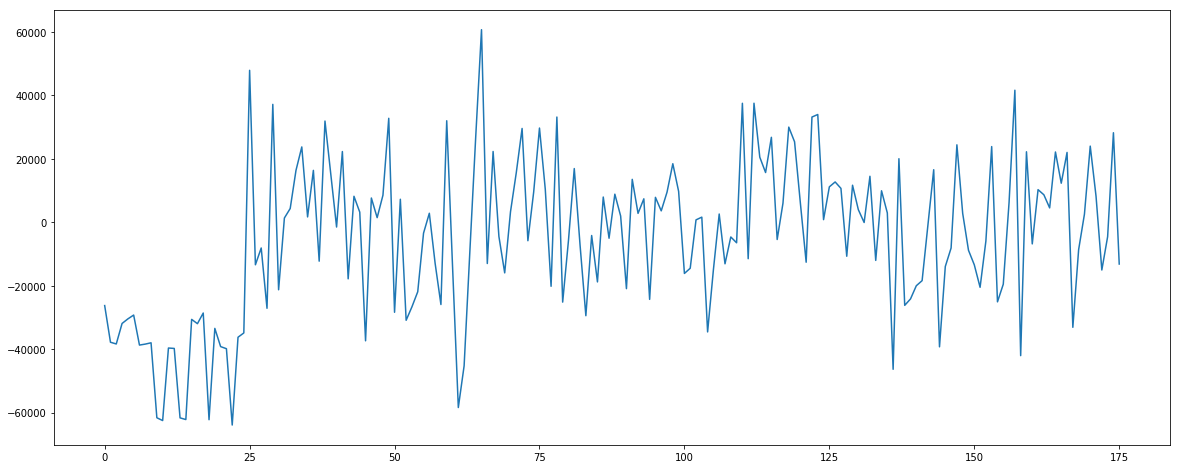

In [8]:
plot_rewards("rewards_02.txt")

```
 """速度惩罚"""
        reward=-abs(self.velocity)*100            

        if pose.position.z < self.target_z:
            """飞行方向惩罚"""
            if pose.orientation.z!=0.0:
                punish=(pose.orientation.z/abs(pose.orientation.z))*5
                reward+=min(0,punish) 
            if self.velocity < 0.0:
                reward-=10
        elif pose.position.z > self.target_z:
            """高度偏离惩罚"""
            reward+=-abs(self.target_z-pose.position.z)*20
            """速度惩罚"""
            if self.velocity < 0:
                reward+=50
            elif self.velocity > 0:
                reward-=100
           
```

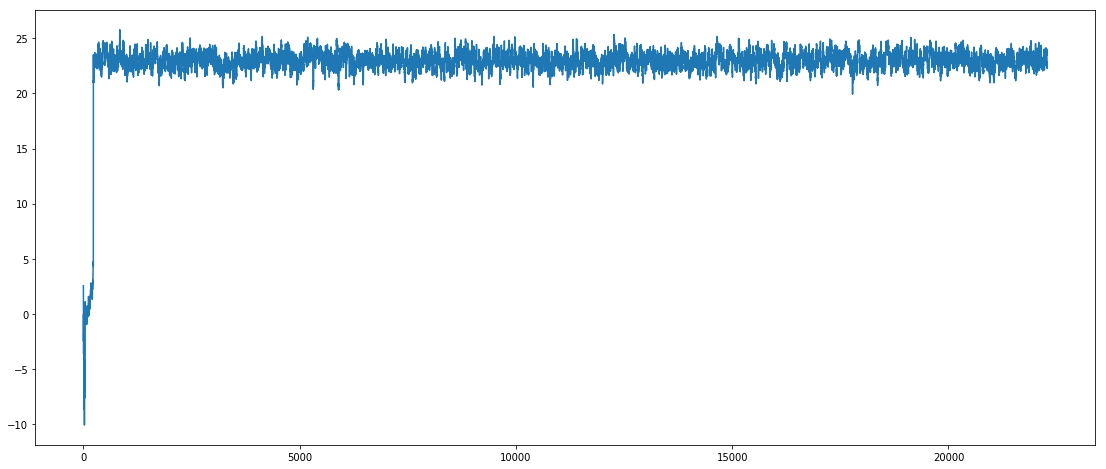

In [9]:
action_values=plot_behaviers("actions_03.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

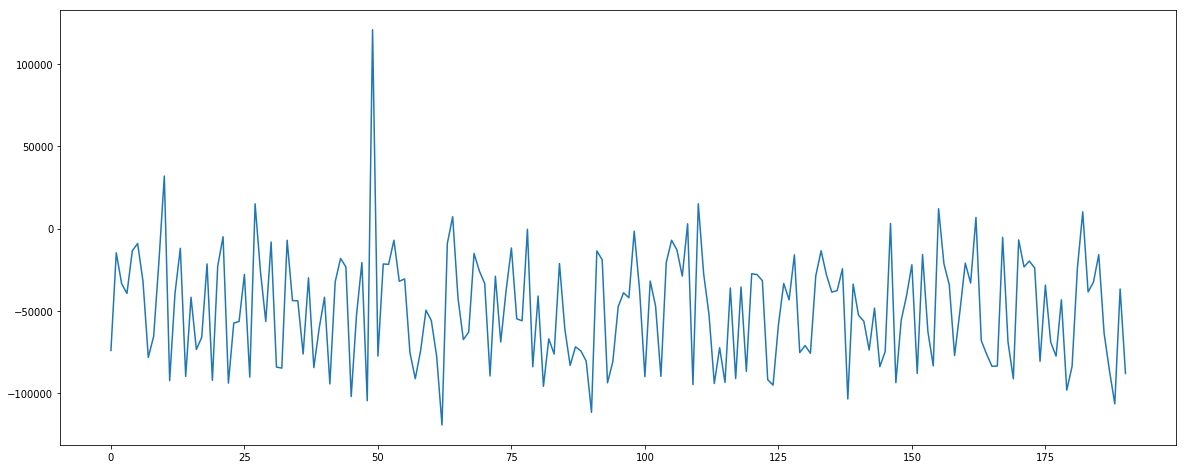

In [10]:
plot_rewards("rewards_03.txt")

* Actor 改成三层 32-64-32

没用。。。。。

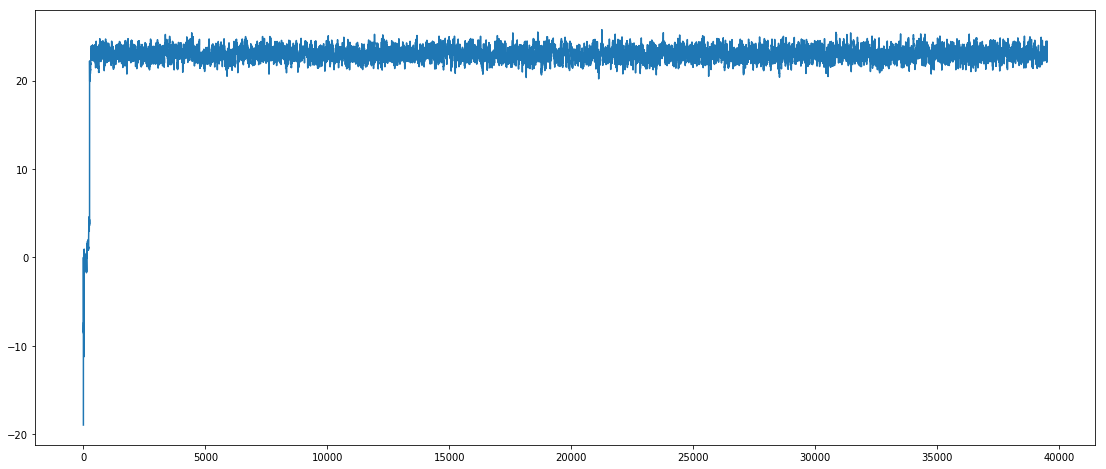

In [11]:
action_values=plot_behaviers("actions_04.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

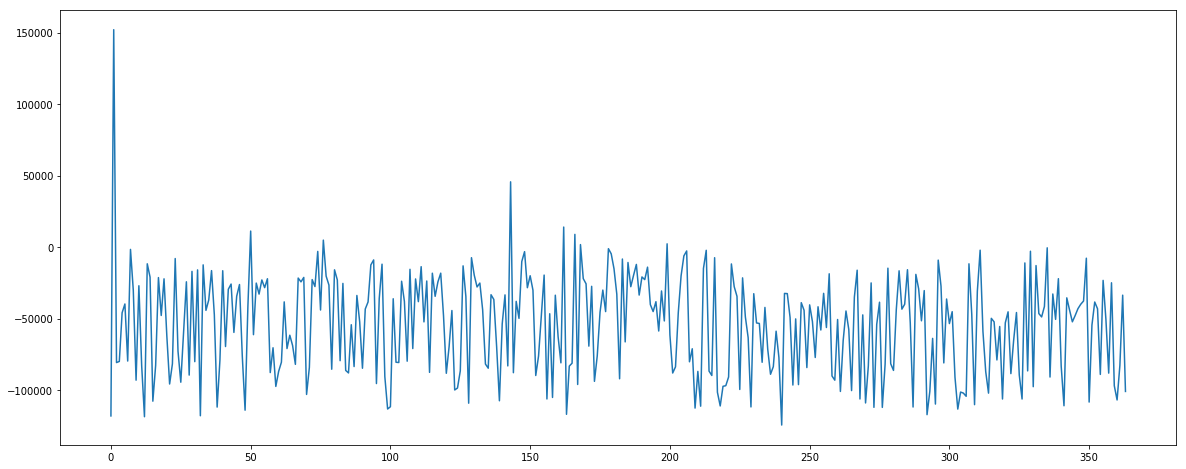

In [12]:
plot_rewards("rewards_04.txt")

* Memory size 改成 5000  
* soft update 系数改成0.005 
* Actor改成 16-32-16

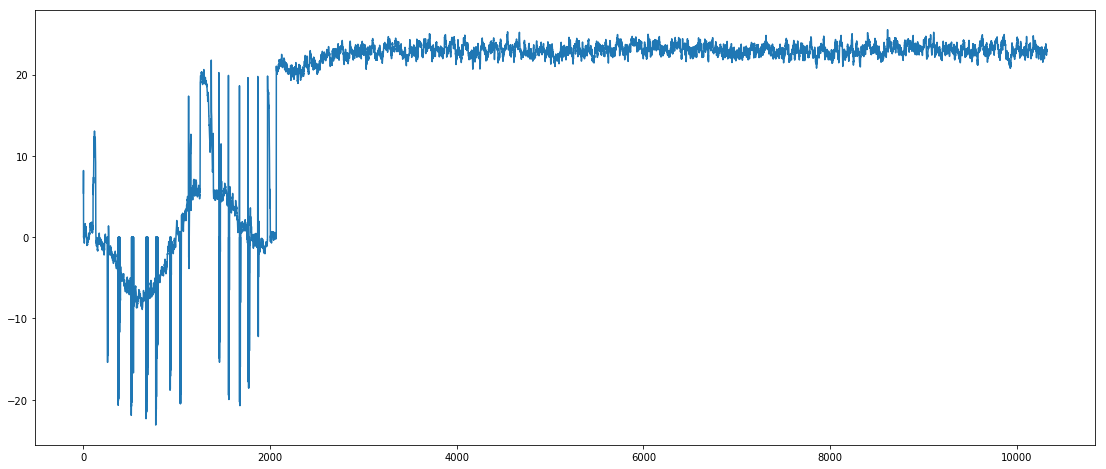

In [5]:
action_values=plot_behaviers("actions_05.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

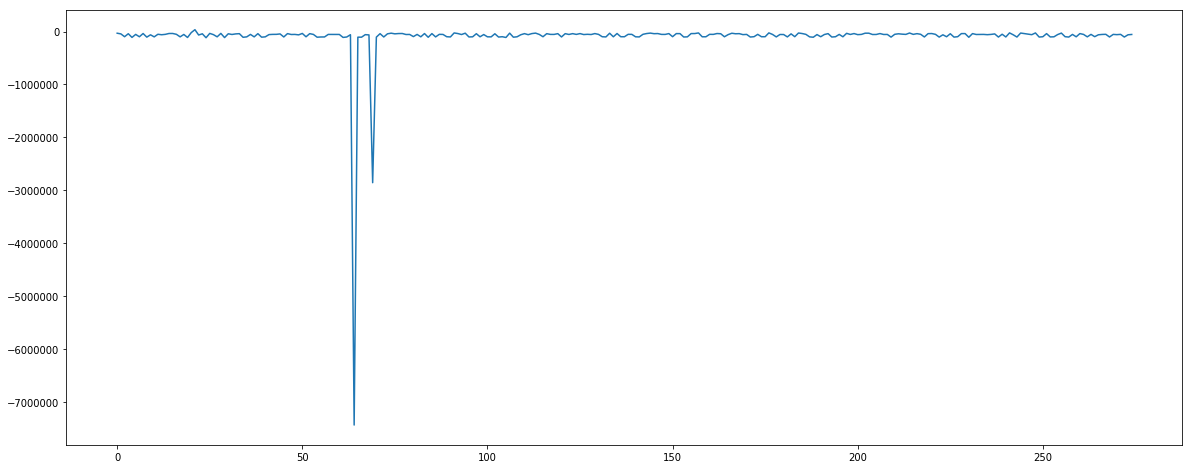

In [6]:
plot_rewards("rewards_05.txt")

* Actor改成 32-32-32

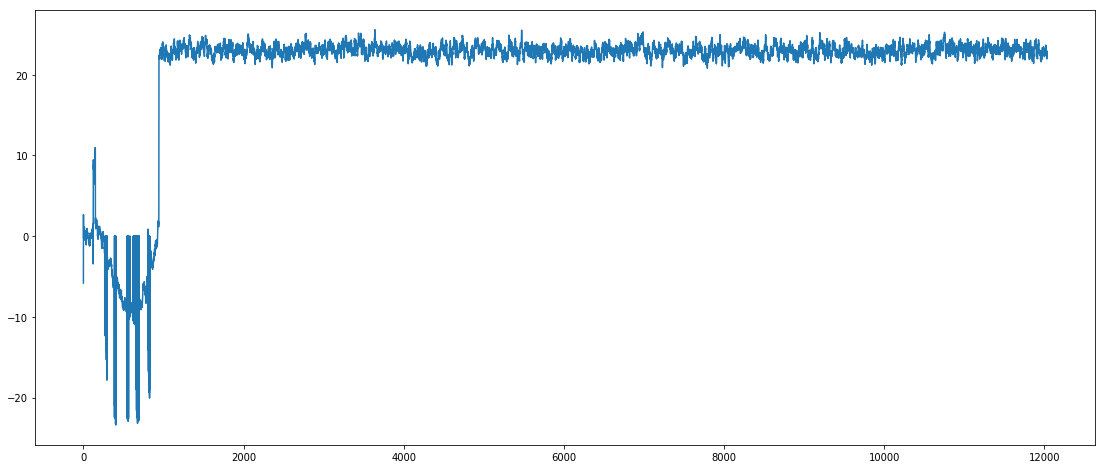

In [7]:
action_values=plot_behaviers("actions_06.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

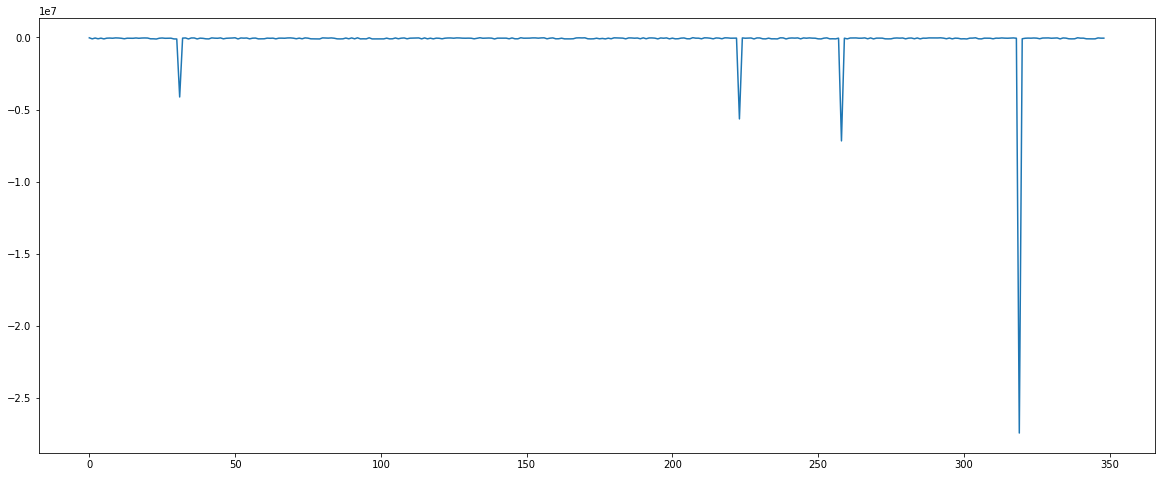

In [8]:
plot_rewards("rewards_06.txt")

* Actor改成 16-32-16 
* Crtic 16-32 + 32

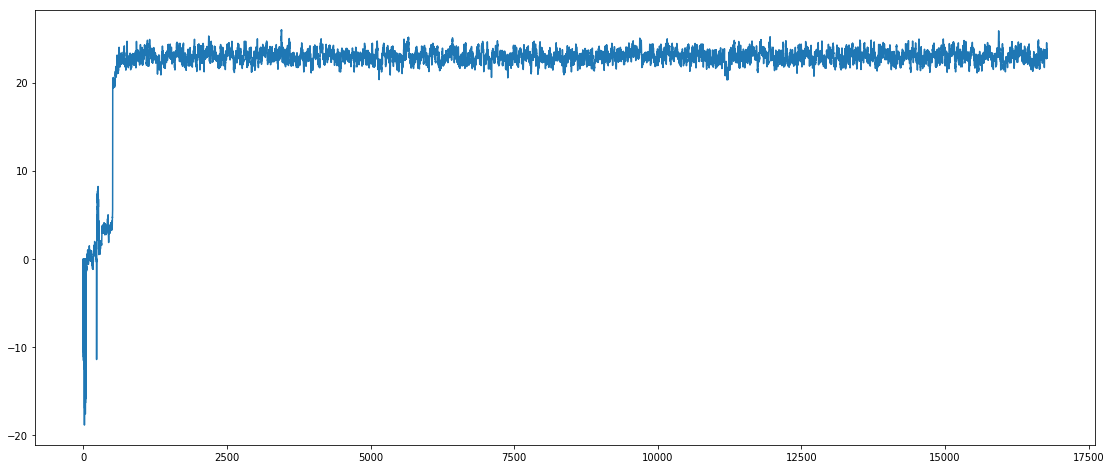

In [9]:
action_values=plot_behaviers("actions_07.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

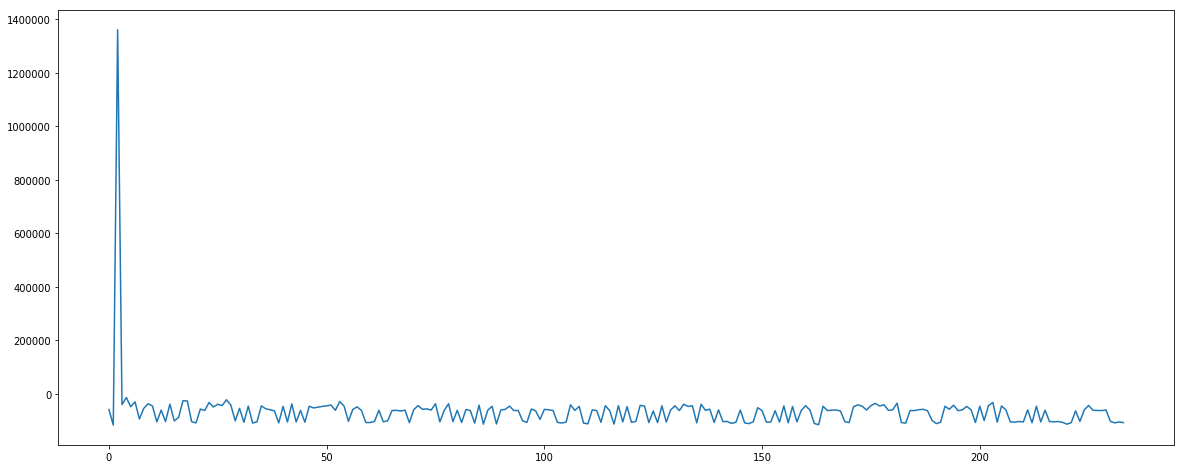

In [10]:
plot_rewards("rewards_07.txt")

* Actor 保持 16-32-16
* Critic 改成16-32 + 16-32

没什么用啊 啊啊啊 啊

#### 奖励函数再调整
```
 """高度偏离惩罚"""
        reward=-abs(self.target_z-pose.position.z)*20
        
        """速度惩罚"""
        if timestamp>1:
            reward-=abs(self.velocity)*20
            reward-=abs(linear_acceleration.z)*20

        """飞行方向惩罚"""
        if pose.position.z < self.target_z:       
            if pose.orientation.z!=0.0:
                punish=(pose.orientation.z/abs(pose.orientation.z))*5
                reward+=min(0,punish) 
            if self.velocity < 0.0:
                reward-=10
        elif pose.position.z > self.target_z: 
            if self.velocity < 0:
                reward+=50
            elif self.velocity > 0:
                reward-=100
           
        """高度目标奖励,速度目标奖励（0.0)"""
        if abs(pose.position.z-self.target_z) < 0.3:
            self.target_hit+=1
            reward+=10*(self.target_hit)**2
            if self.velocity==0.0:
                reward+=100
```

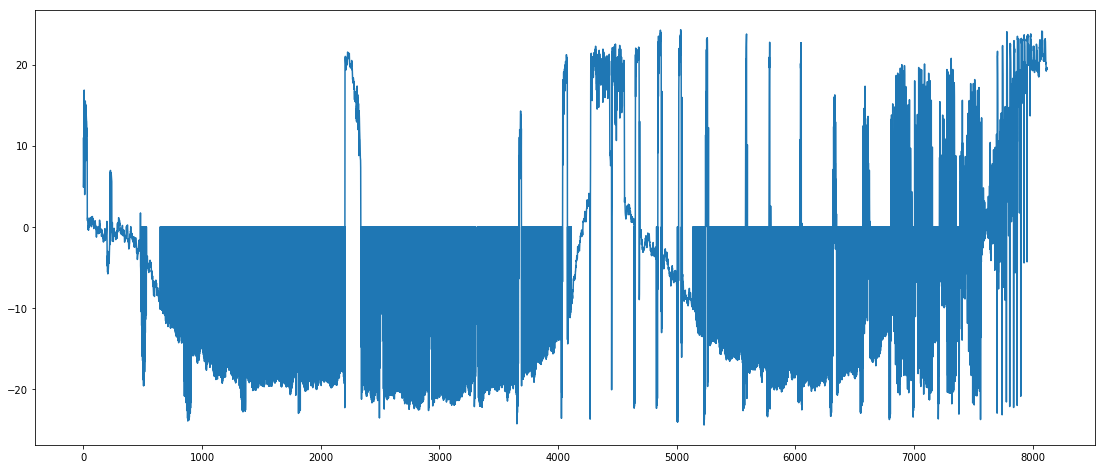

In [12]:
action_values=plot_behaviers("actions_08.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

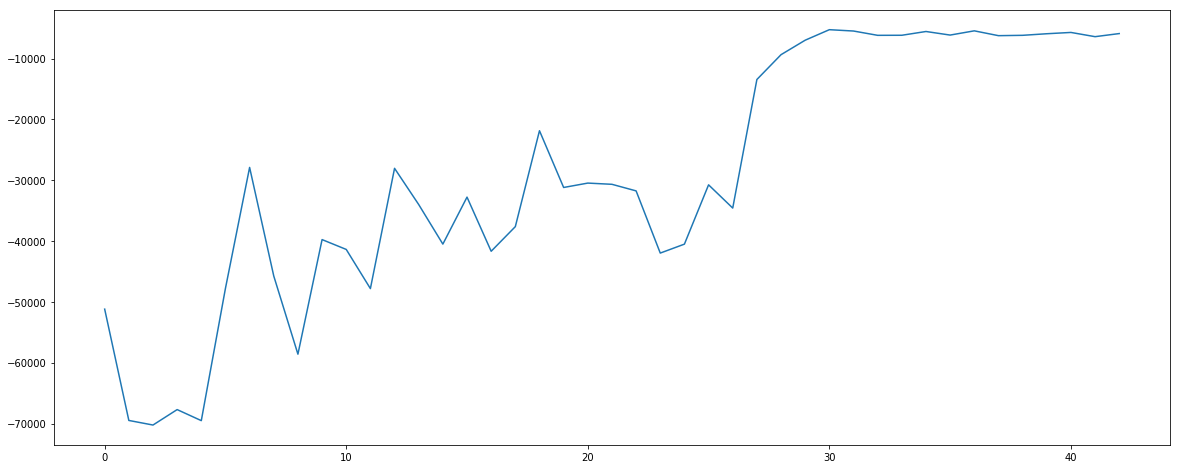

In [11]:
plot_rewards("rewards_08.txt")

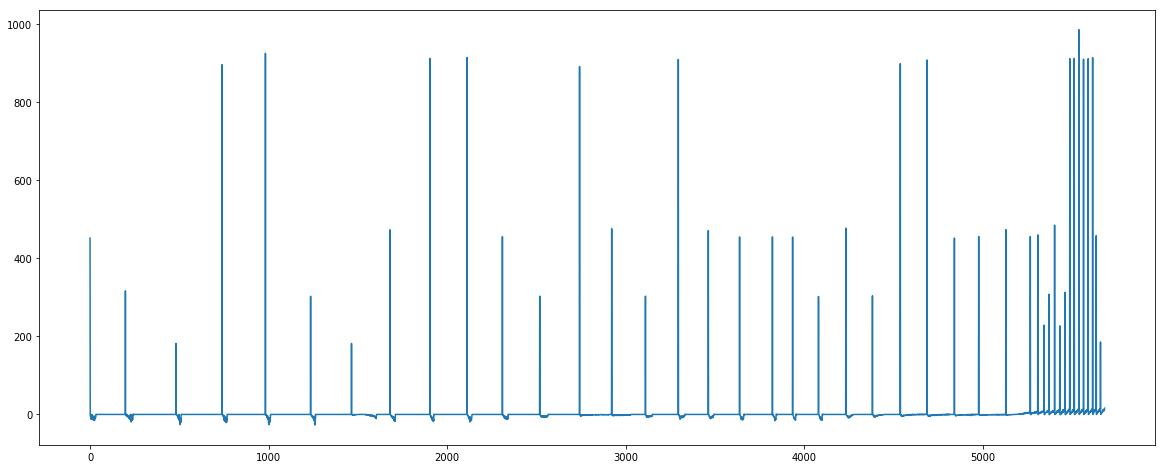

In [14]:
vels=plot_vel("states_08.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=6000,right=8000)
#plt.ylim(bottom=-20,top=100)

加大飞翔方向惩罚
```
"""飞行方向惩罚"""
        if pose.position.z < self.target_z:       
            if pose.orientation.z!=0.0:
                punish=(pose.orientation.z/abs(pose.orientation.z))*5
                reward+=min(0,punish) 
            if self.velocity < 0.0:
                reward-=10
        elif pose.position.z > self.target_z: 
            if self.velocity < 0:
                reward+=10
            elif self.velocity > 0:
                reward-=200
```

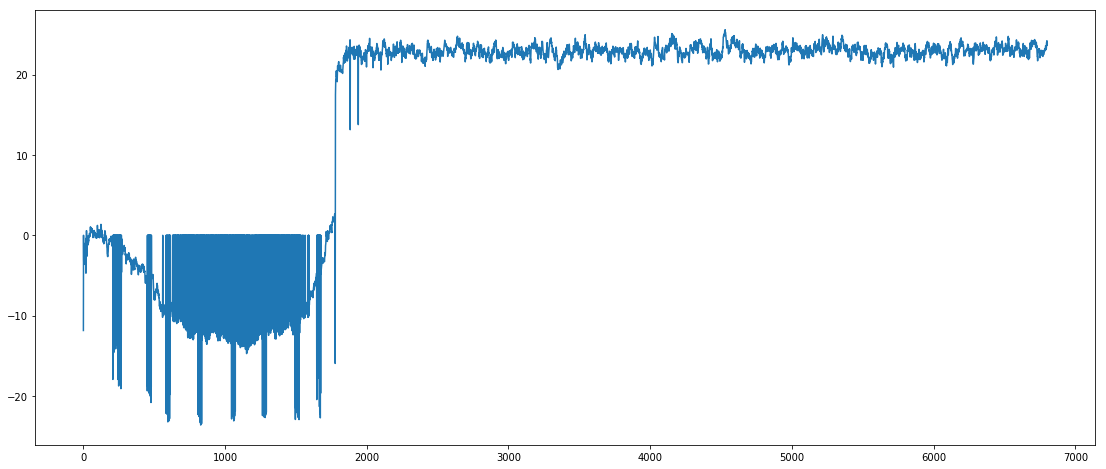

In [16]:
action_values=plot_behaviers("actions_09.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

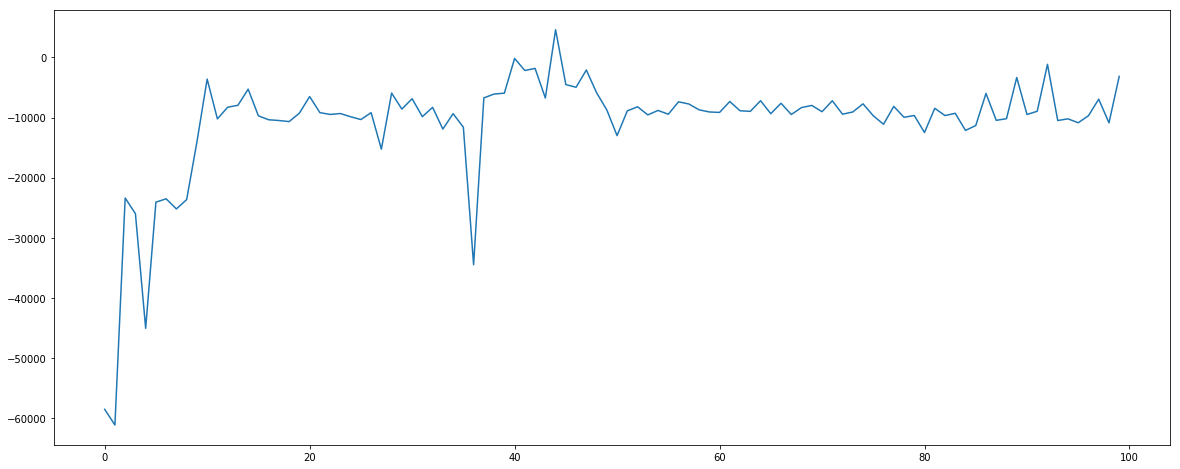

In [15]:
plot_rewards("rewards_09.txt")

加大速度惩罚
```
"""速度惩罚"""
        if timestamp>1:
            reward-=abs(self.velocity)*50
            reward-=abs(linear_acceleration.z)*50
```
Crtic改成 16-16 + 16-16

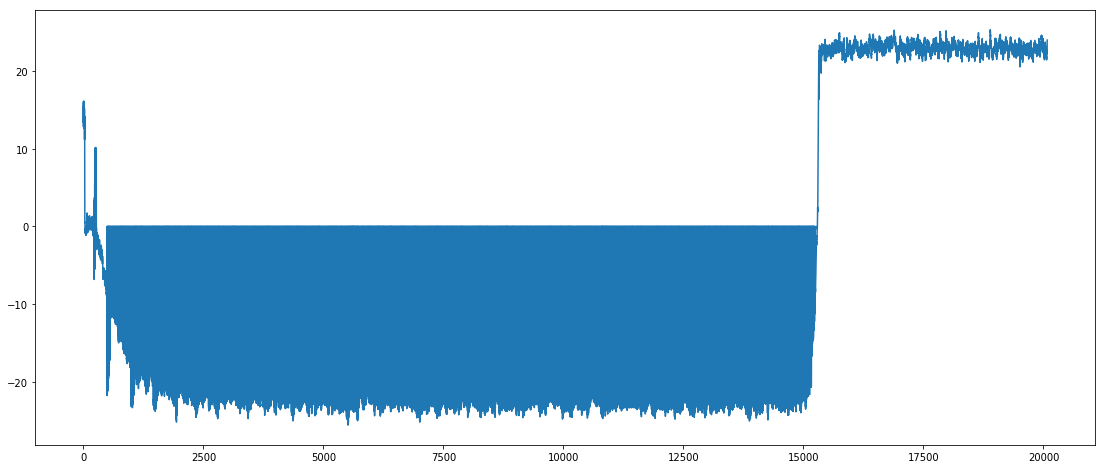

In [18]:
action_values=plot_behaviers("actions_10.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

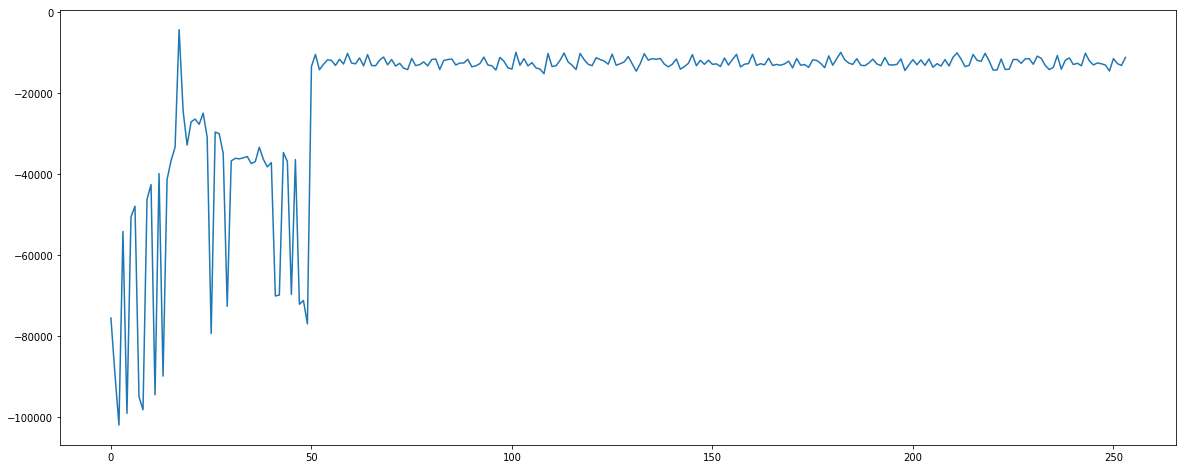

In [17]:
plot_rewards("rewards_10.txt")

Actor 改成 16-16-16  
```
        """高度偏离惩罚"""
        reward=-abs(self.target_z-pose.position.z)*20
        
        """速度惩罚"""
        if timestamp>1:
            reward-=abs(self.velocity)*50
            reward-=abs(linear_acceleration.z)*50

        """飞行方向惩罚"""
        if pose.position.z < self.target_z:       
            if pose.orientation.z!=0.0:
                punish=(pose.orientation.z/abs(pose.orientation.z))*5
                reward+=min(0,punish) 
            if self.velocity < 0.0:
                reward-=10
        elif pose.position.z > self.target_z: 
            if self.velocity < 0:
                reward+=10
            elif self.velocity > 0:
                reward-=200
           
        """高度目标奖励,速度目标奖励（0.0)"""
        if abs(pose.position.z-self.target_z) < 0.3:
            self.target_hit+=1
            reward+=10*(self.target_hit)**2
            if self.velocity==0.0:
                reward+=100
            
        """阶段结束条件"""
        if pose.position.z > self.height_limit:
            reward-=1000
            done=True
        if timestamp > self.max_duration:
            done=True
```

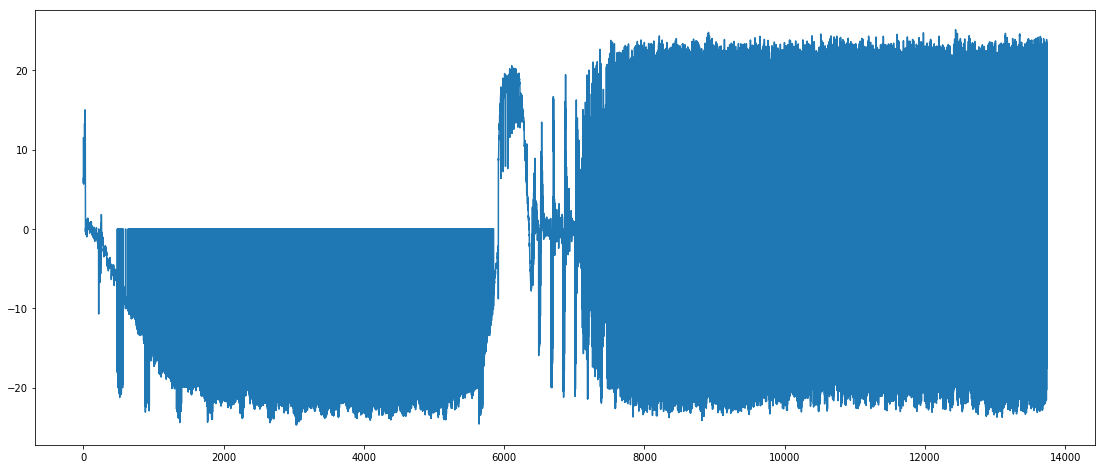

In [20]:
action_values=plot_behaviers("actions_11.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

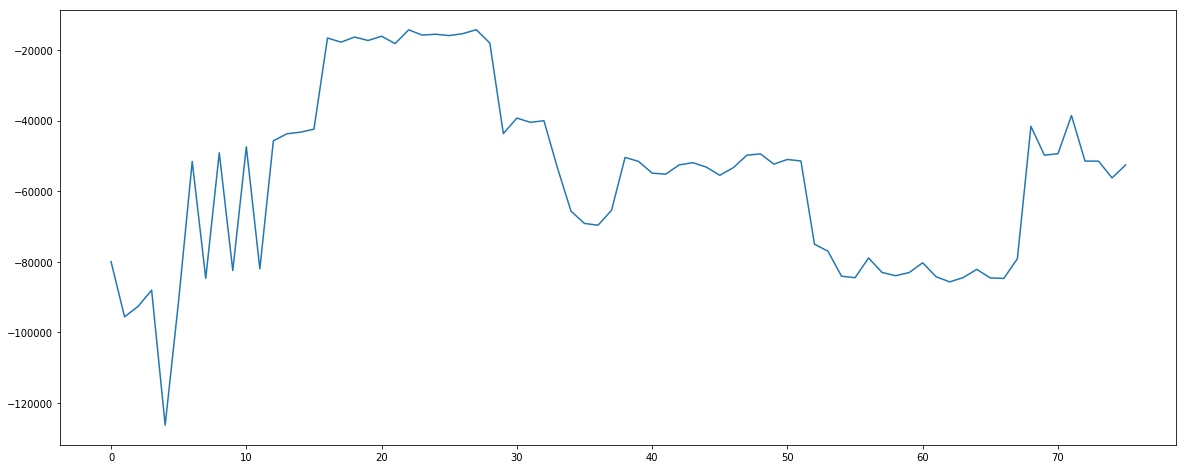

In [19]:
plot_rewards("rewards_11.txt")

hover-Trial-04

* Actor 改成 8-16-8
* batch_size 改成150

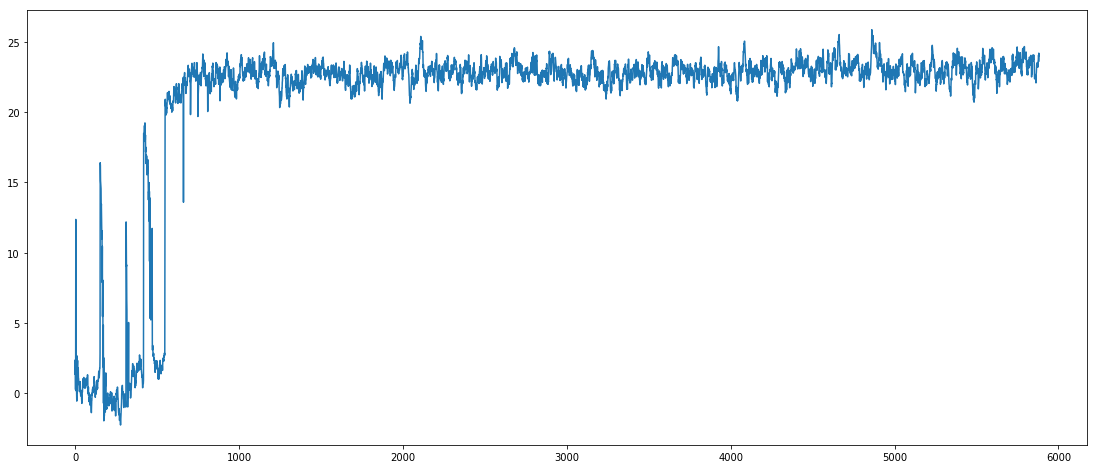

In [21]:
action_values=plot_behaviers("actions_12.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

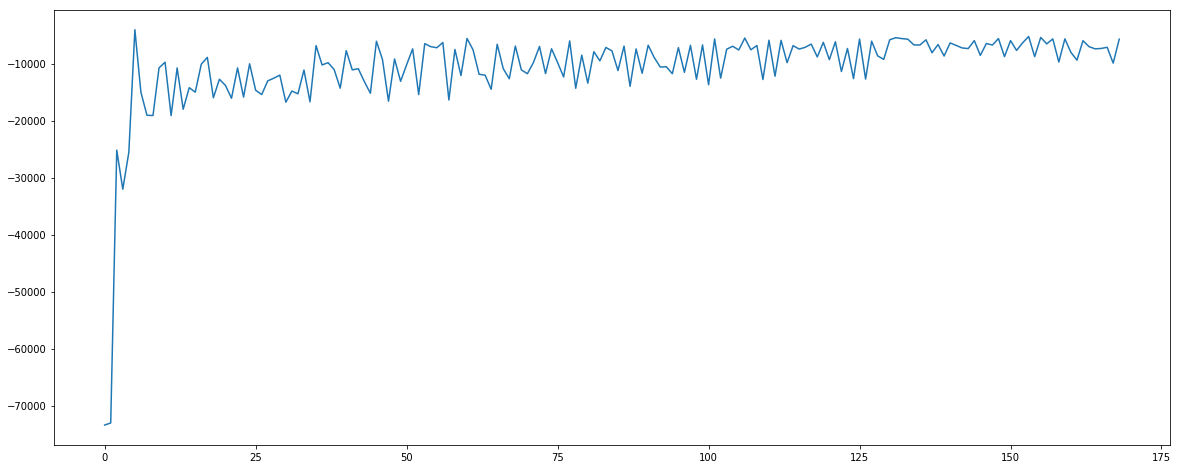

In [22]:
plot_rewards("rewards_12.txt")

(-20, 100)

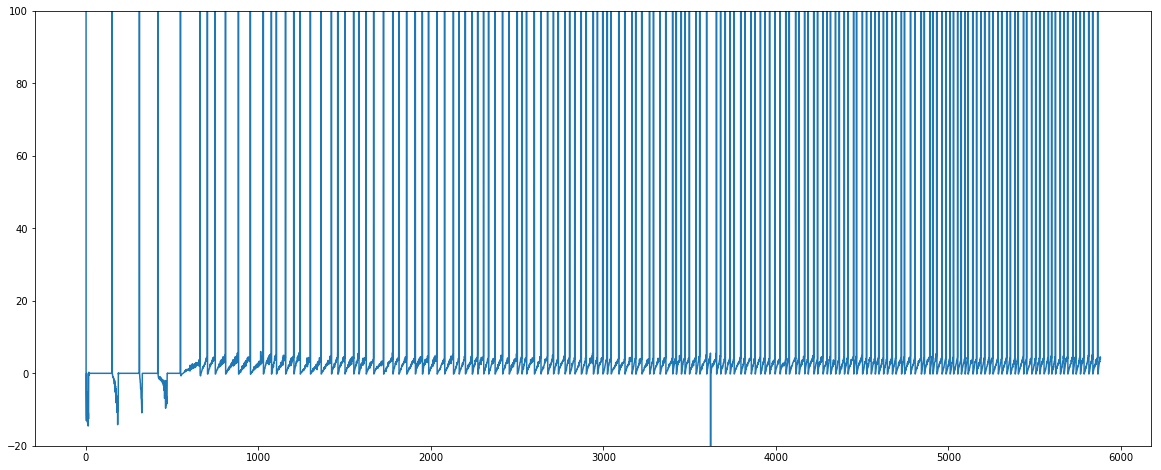

In [24]:
vels=plot_vel("states_12.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=6000,right=8000)
plt.ylim(bottom=-20,top=100)

```
 """高度偏离惩罚"""
        reward=-abs(self.target_z-pose.position.z)*20
        
        """速度惩罚"""
        if timestamp>1:
            reward-=abs(linear_acceleration.z)*50
           
        """高度目标奖励,速度惩罚"""
        if abs(pose.position.z-self.target_z) < 0.3:
            self.target_hit+=1
            reward+=10*(self.target_hit)**2
            reward-=abs(self.velocity)*50
```

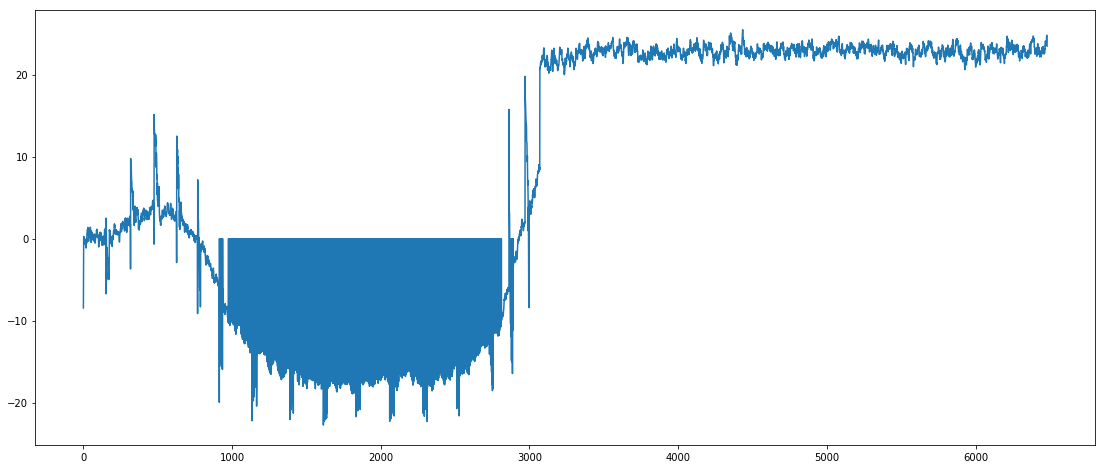

In [25]:
action_values=plot_behaviers("actions_13.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

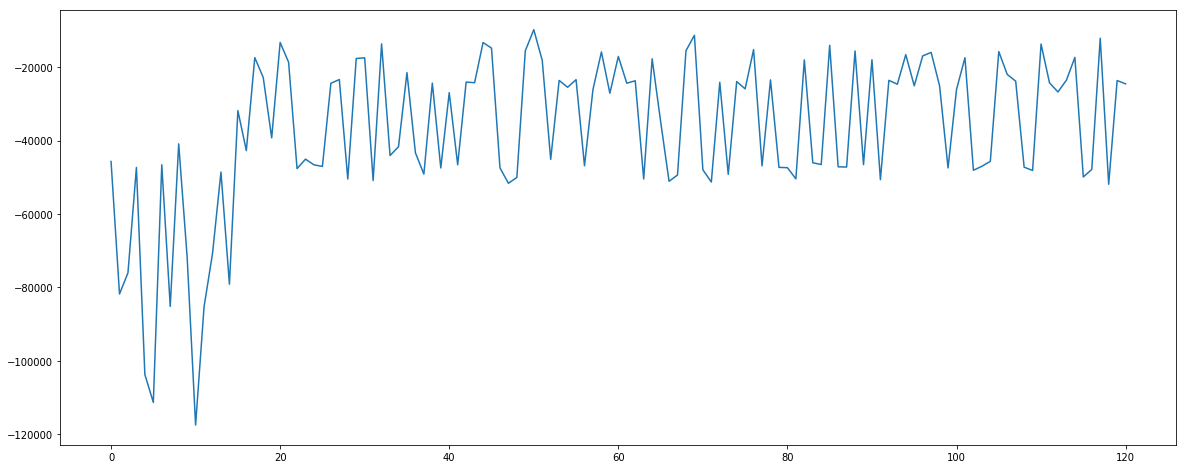

In [26]:
plot_rewards("rewards_13.txt")

```
  
        """高度偏离惩罚"""
        reward=-abs(self.target_z-pose.position.z)*20
        
        """速度惩罚"""
        if timestamp>1:
            reward-=abs(linear_acceleration.z)*100
           
        """高度目标奖励,速度惩罚"""
        if abs(pose.position.z-self.target_z) < 0.3:
            self.target_hit+=1
            reward+=10*(self.target_hit)**2
            reward-=abs(self.velocity)*100
            
        """阶段结束条件"""
        if pose.position.z > self.height_limit:
            done=True
        if timestamp > self.max_duration:
            done=True
```  
Actor 改成 8-16-8

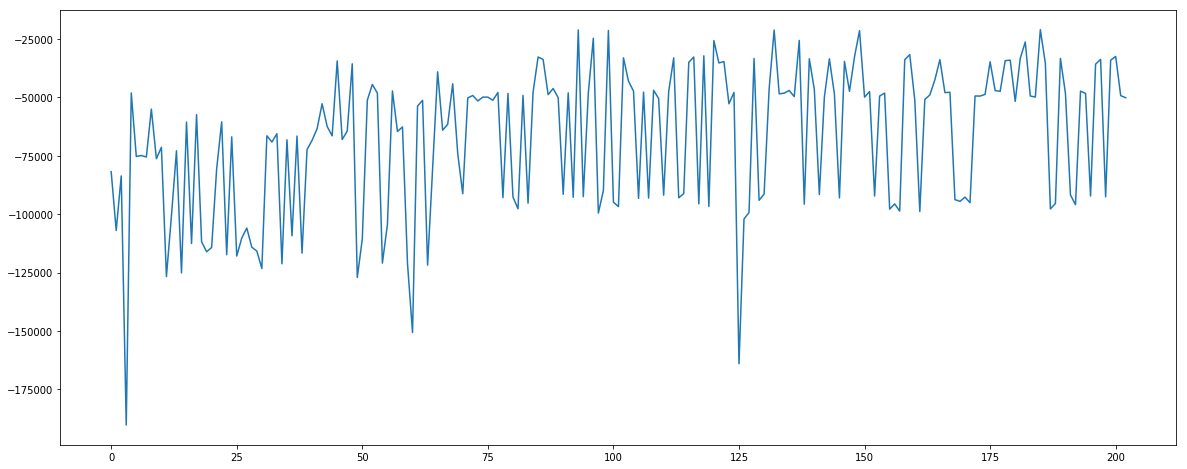

In [30]:
plot_rewards("rewards_14.txt")

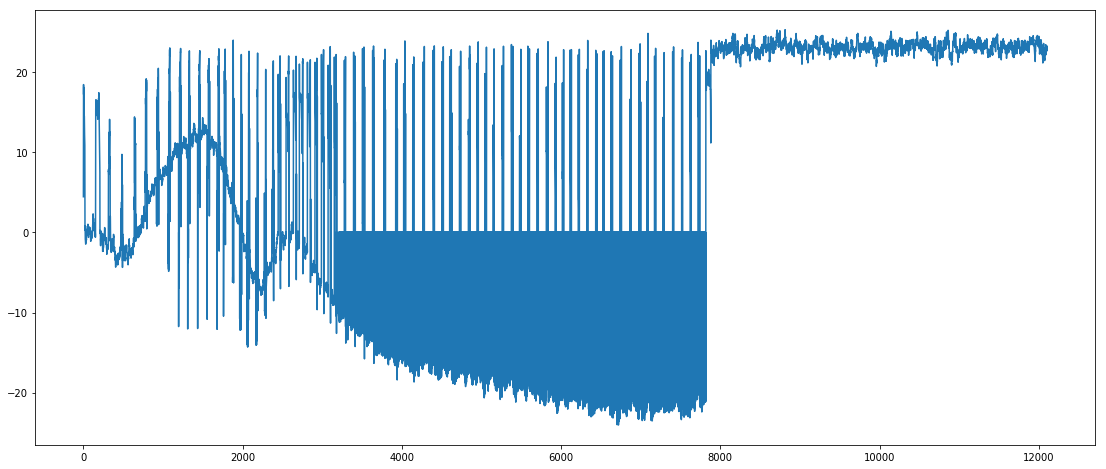

In [28]:
action_values=plot_behaviers("actions_14.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

* Actor 改成 16-16-16
* Critic 16-16 + 16-16

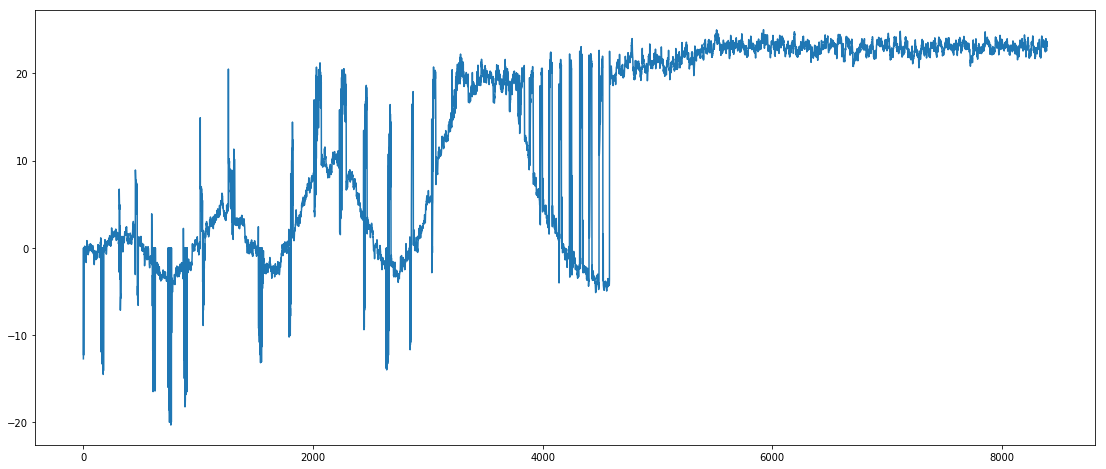

In [32]:
action_values=plot_behaviers("actions_15.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

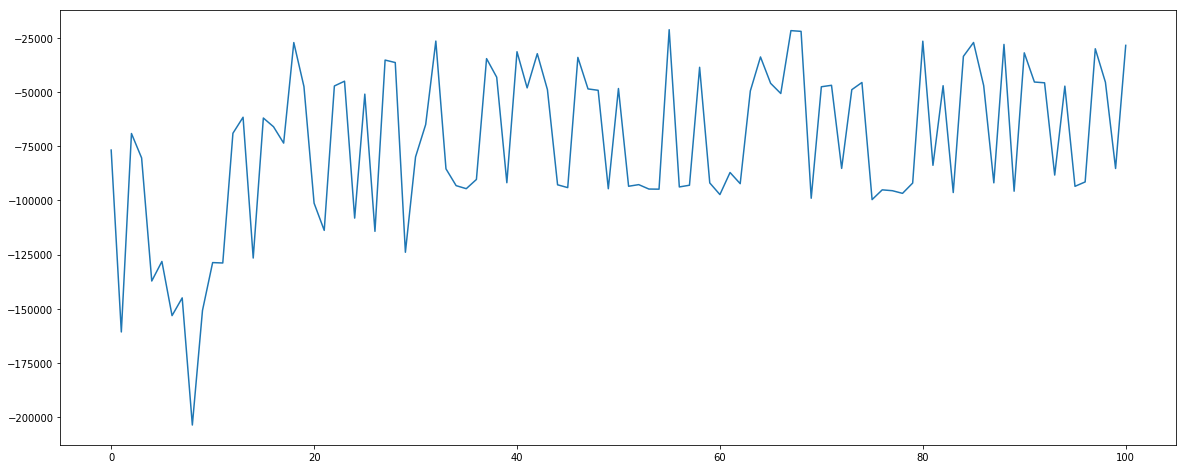

In [31]:
plot_rewards("rewards_15.txt")

有一段可以用做 landing

* Crtic 改成 32-16 + 32-16

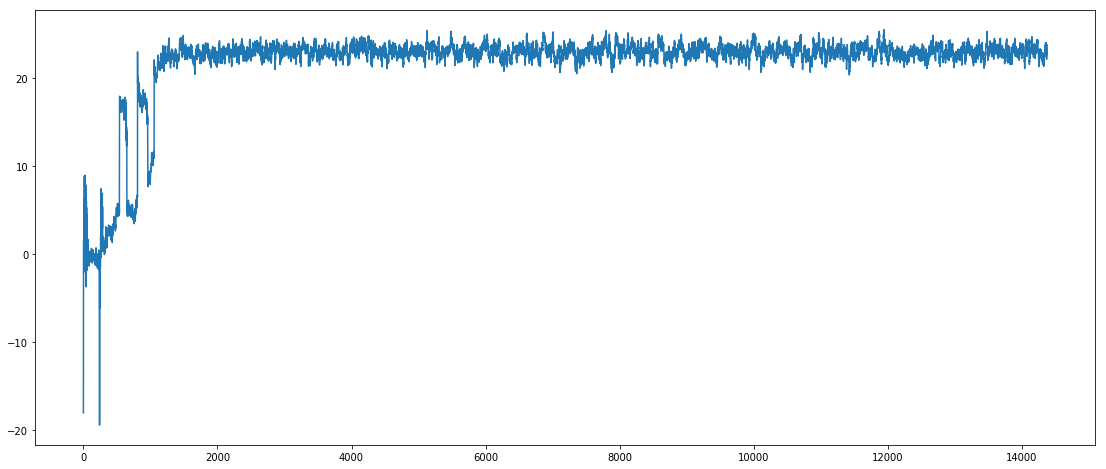

In [34]:
action_values=plot_behaviers("actions_16.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

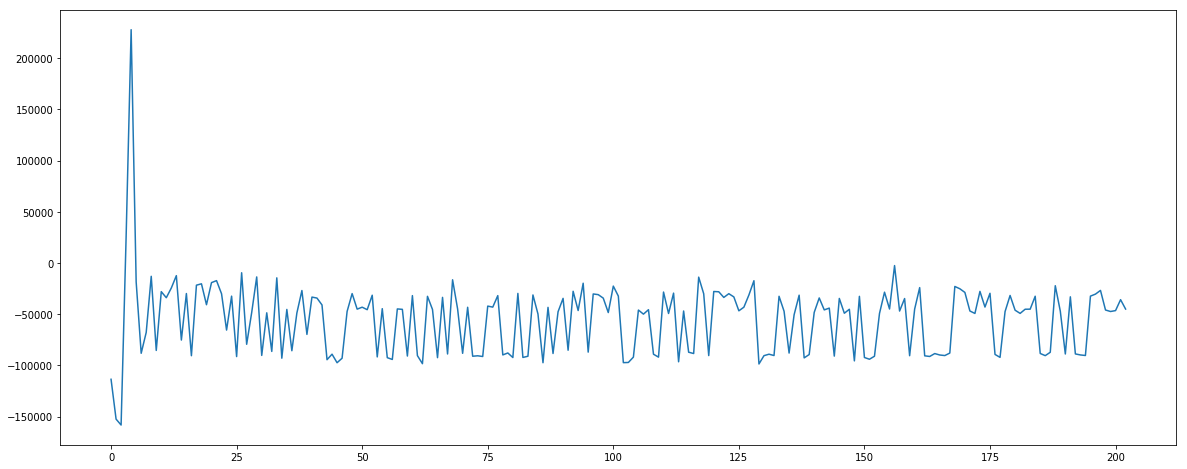

In [33]:
plot_rewards("rewards_16.txt")

* Crtic 改成 8-16 + 8-16
* Actor 维持 16-16-16

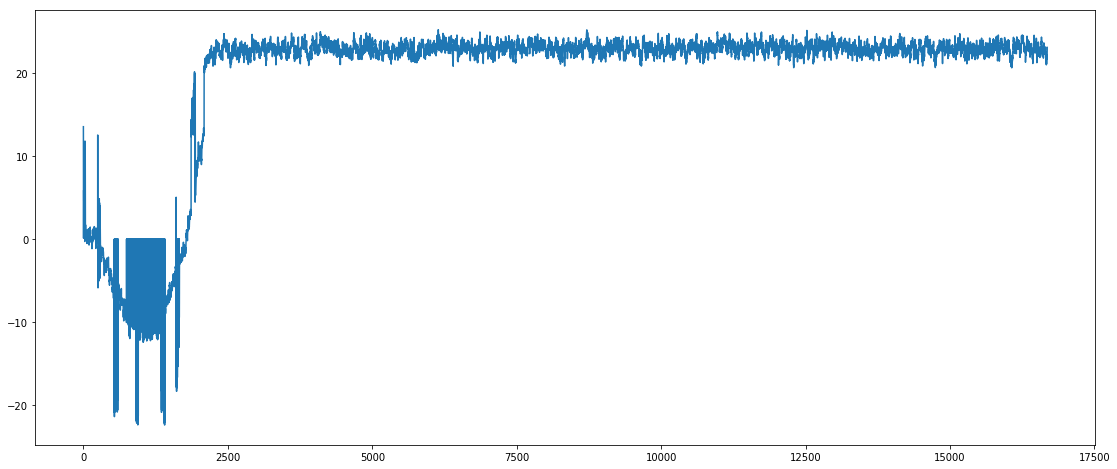

In [36]:
action_values=plot_behaviers("actions_17.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

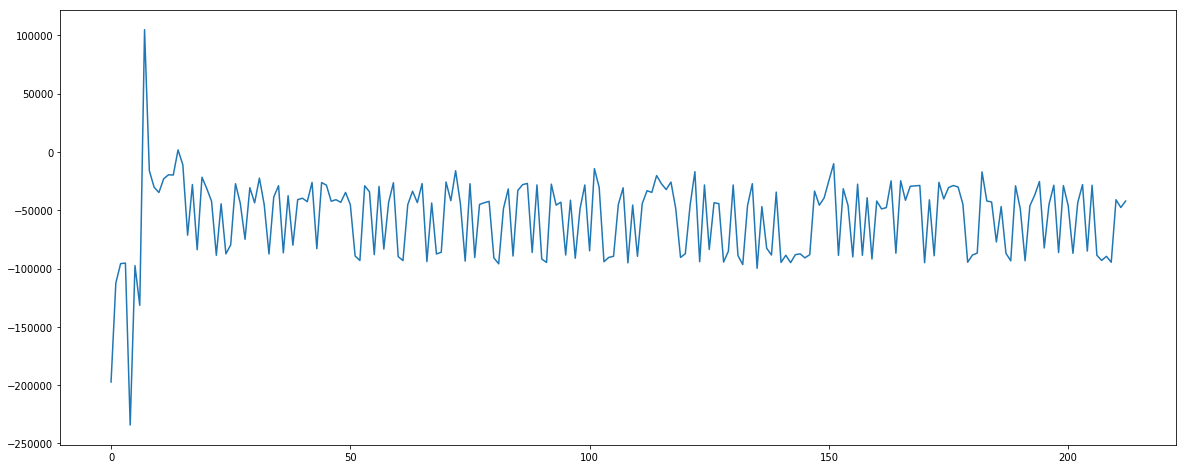

In [35]:
plot_rewards("rewards_17.txt")

* Crtic 改成 16-16 + 16（actions path减少一层）
* Actor 维持 16-16-16

In [ ]:
不管用啊啊

* Crtic : 16-8 +8 
* Actor 8-8-8

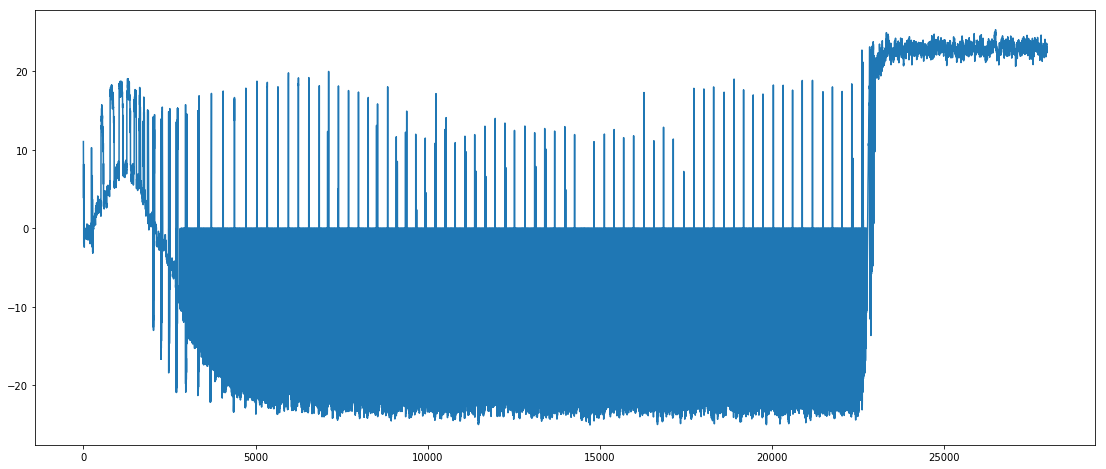

In [38]:
action_values=plot_behaviers("actions_18.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

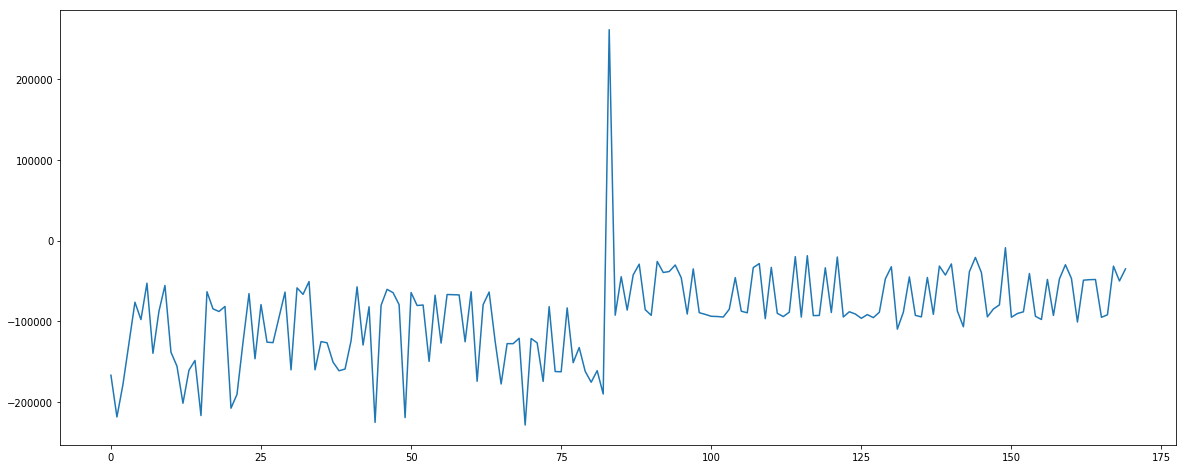

In [37]:
plot_rewards("rewards_18.txt")